In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Import

In [6]:
city = pd.read_csv("city.csv")
cab = pd.read_csv("Cab_Data.csv")
cus = pd.read_csv("Customer_ID.csv")
trans = pd.read_csv("Transaction_ID.csv")

In [8]:
#check missing values
city_mv = city.isna().sum().sum()
cab_mv = cab.isna().sum().sum()
cus_mv = cus.isna().sum().sum()
trans_mv = trans.isna().sum().sum()
print("number of missing values in city", city_mv)
print("number of missing values in cab", cab_mv)
print("number of missing values in CUstomer ID", cus_mv)
print("number of missing values in Transaction ID", trans_mv)

number of missing values in city 0
number of missing values in cab 0
number of missing values in CUstomer ID 0
number of missing values in Transaction ID 0


#### Output the info for each csv

In [13]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [15]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


Show the first few lines of each csv

In [58]:
#convert data types
city["Population"] = city["Population"].str.replace(',','').astype(int)
city["Users"] = city["Users"].str.replace(',','').astype(int)
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [49]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [19]:
cus.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [20]:
trans.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


#### Merge the dataset

In [91]:
merged_data = pd.merge(cus, trans, on = 'Customer ID')

In [95]:
merged_data1 = pd.merge(cab, merged_data, on = 'Transaction ID')
merged_data1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,profit per km,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266,29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904,27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558,28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751,28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439,27182,Male,33,8536,Card


## Data visualization

#### Assumption 1: Whether the number of transactions is related to the users in the city

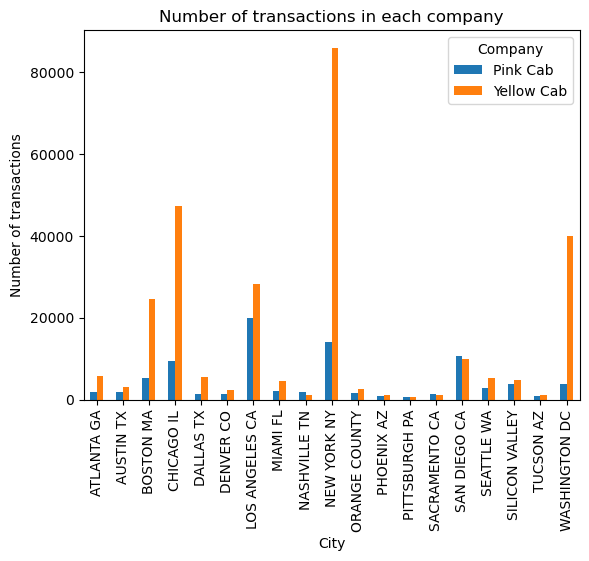

In [50]:
#count the number of occurrences for each company in different cities
city_count = cab.groupby(['Company',"City"]).size().reset_index(name = 'counts')
#covert the data to matrix with company as columns as the city as rows
city_matrix = city_count.pivot(index = "City", columns = "Company", values = 'counts')
#draw the plot
city_matrix.plot(kind = "bar")
#set plot title and axis labels
plt.title('Number of transactions in each company')
plt.xlabel('City')
plt.ylabel('Number of transactions')
#show the plot
plt.show()

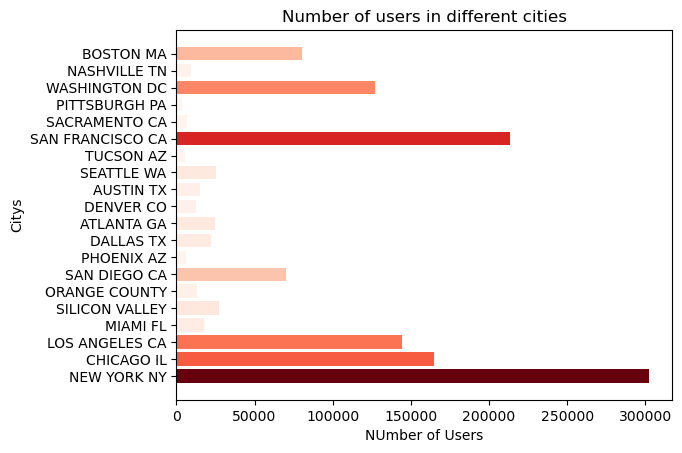

In [89]:
cmap = plt.get_cmap('Reds')
normalize = plt.Normalize(min(city['Users']), max(city['Users']))
colors = [cmap(normalize(i)) for i in city['Users']]

plt.barh(city['City'], city["Users"], color = colors )
plt.title('Number of users in different cities')
plt.xlabel('NUmber of Users')
plt.ylabel('Citys')
plt.show()

By some reasons, we don't have the information about the transaction in San Franciso, so we'll ignore its data for now. From the above plots, we can see that Yellow Cab has much more number of transactions in most of cities. The top 5 cities of number of transactions for Yellow Cab are New York, Chicago Washington DC, Los Angeles, Boston, and the top 5 cities of number of users for Yellow Cab are New York, Chicago, Los Angeles, Washington DC, and Boston. There are 5 of them matches which means the number of transaction is related to the users in the city for Yellow Cab.

#### Assumption 2: Does Yellow cab make more profit per KM than Pink cab?

In [75]:
cab['profit'] = cab['Price Charged'] - cab['Cost of Trip']
cab['profit per km'] = cab['profit'] / cab['KM Travelled']

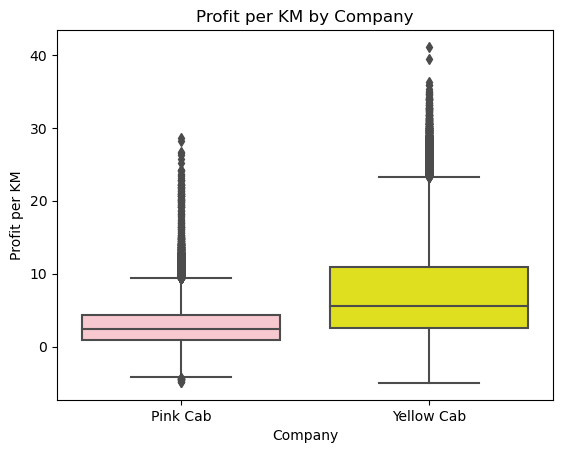

In [82]:
sns.boxplot(x = "Company", y = "profit per km", data = cab, palette = {'Pink Cab':'pink','Yellow Cab': "yellow"})
plt.title('Profit per KM by Company')
plt.xlabel('Company')
plt.ylabel('Profit per KM')
plt.show()

From the plot above, we can see that yellow cab make more profit per km than pink cab, that might caused by the top 5 cities of number of transactions have higher commondity price, and Yellow cab have more transactions than Pink Cab in those cities.

#### Assumption 3: Which gender type use more cab service?

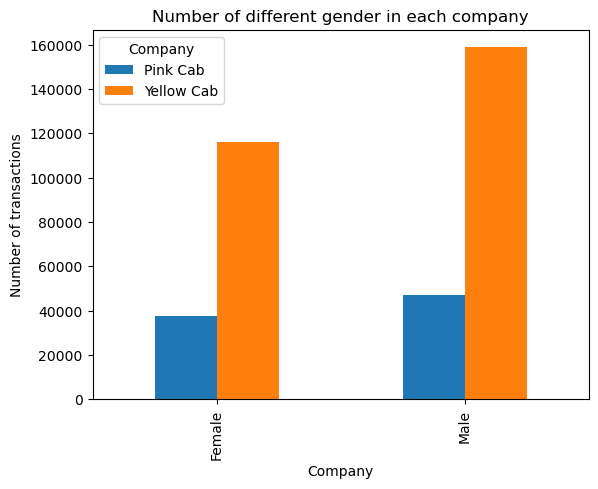

In [94]:
#count the number of occurrences for each company in different cities
gender_count = merged_data1.groupby(['Company',"Gender"]).size().reset_index(name = 'counts')
#covert the data to matrix with company as columns as the city as rows
gender_matrix = gender_count.pivot(index = "Gender", columns = "Company", values = 'counts')
#draw the plot
gender_matrix.plot(kind = "bar")
#set plot title and axis labels
plt.title('Number of different gender in each company')
plt.xlabel('Company')
plt.ylabel('Number of transactions')
#show the plot
plt.show()

From the above plot, we can see that Male use more service than Female in both companies service, but Yellow cab have more transactions than Pink cab. It might caused by the number of cabs or people needs in differenct cities.

#### Assumption 4: How does income level affect the profit?

In [103]:
cab.groupby('Company')['profit'].apply('sum')

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: profit, dtype: float64

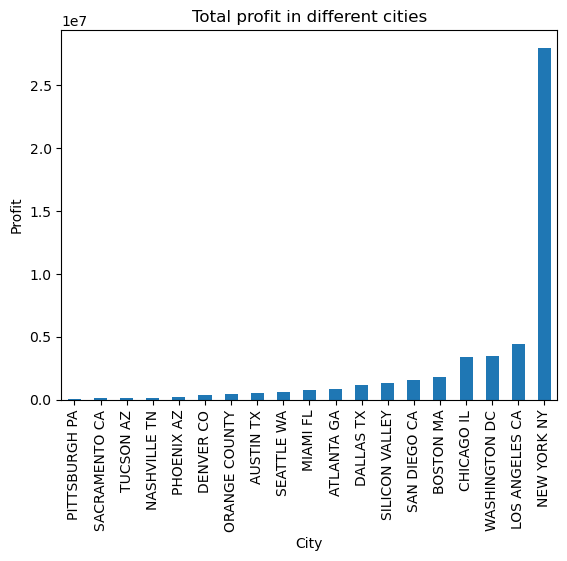

In [149]:
aggd = cab.groupby('City')['profit'].agg('sum')
aggd.sort_values().plot(kind = "bar")

#set plot title and axis labels
plt.title('Total profit in different cities')
plt.xlabel('City')
plt.ylabel('Profit')
#show the plot
plt.show()

Based on the US News, low income are the people make less than 4350 per month, middle income are the people who make 4350 to 13050 per month, and the upper income are the people who make more than 15600 per month.

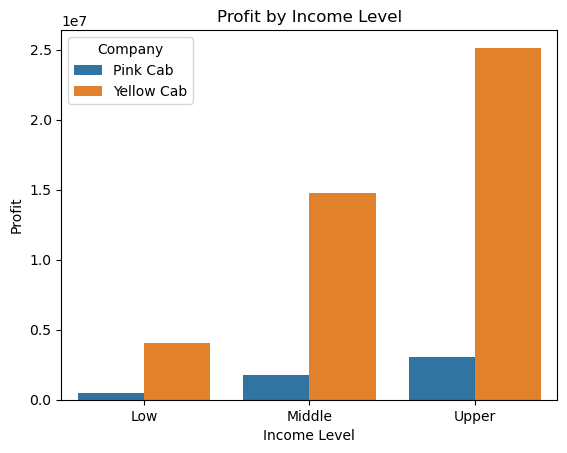

In [147]:
bins = [0, 4350, 13050, 50000]
labels = ['Low', 'Middle','Upper']
merged_data1['income_group']= pd.cut(merged_data1['Income (USD/Month)'], bins = bins, labels = labels)
income_groups = merged_data1.groupby(['income_group', 'Company'])['profit'].sum().reset_index()
sns.barplot(x='income_group', y='profit', hue='Company', data=income_groups)

plt.xlabel('Income Level')
plt.ylabel('Profit')
plt.title('Profit by Income Level')
plt.show()

From the above plot, we can see the main customer of both cab services are Upper and Middle level of income group. The profit brought by the upper level is higher than the middle plus low, which indicated people have higher income are more willing to use cab service. Related to total profit in different cities plot, people live in big cities may have higher income.

#### Assumption 5: how does age affect the profit?

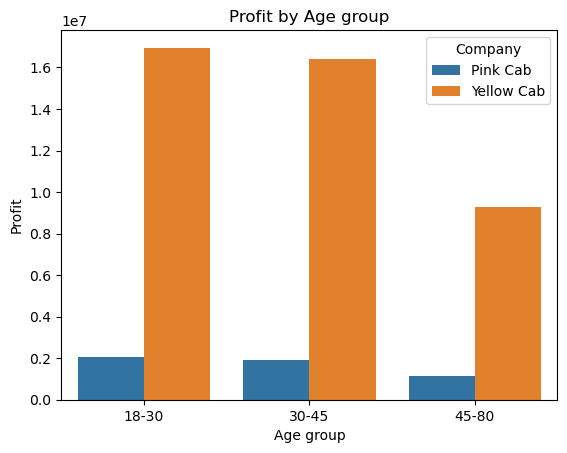

In [133]:
bins = [18, 30, 45, 80]
labels = ['18-30', '30-45','45-80']
merged_data1['age_group']= pd.cut(merged_data1['Age'], bins = bins, labels = labels)
income_groups = merged_data1.groupby(['age_group', 'Company'])['profit'].sum().reset_index()
sns.barplot(x='age_group', y='profit', hue='Company', data=income_groups)

plt.xlabel('Age group')
plt.ylabel('Profit')
plt.title('Profit by Age group')
plt.show()

From the plot above, I'd like to say that younger people use more cab service, it might caused by more young age people live in big cities to make money.

## Conclusion

In short, Yellow Cab have more number of transaction and make more profit over the years. Also, the Yellow Cab is the main cab service in big cities which can make more profit than other cabs. Therefore, my recommendation is to invert Yellow Cab.